# Finding the heavy traffic indicators on I-94

![I-94 Figma Overview](i94_figma.png)



## Introduction
Interstate 94 is an east-west Interstate Highway in United States. In this project, we are going to analyze the data to **determine the key indicators of heavy traffic** on I-94. These indicators can be weather type, time of the day, etc.

## Dataset
The dataset we are using is from UCI Machine Learning Repository, it includes all the necessary details of traffic on I-94. The data is recorded by the station located between Minneapolis and Saint Paul, and only the traffic moving **from east to west** is recorded, but is sufficient enough for this analysis.

## Dataset Preprocessing

In [89]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
# load the dataset
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [91]:
# display the general information about the DataFrame
print("*" * 100)
print("General Information:")
print(df.info())
print("*" * 100)

# print the first and last 5 rows of the DataFrame
print("*" * 100)
print("First 5 rows:")
print(df.head())
print("*" * 100)

print("*" * 100)
print("Last 5 rows:")
print(df.tail())
print("*" * 100)

****************************************************************************************************
General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
****************************************************************************************************
****************************************************

There are several interesting observations about the dataset. First, it includes **9 columns** with different features, such as **numerical information like temperature, rain, and snow**, as well as **descriptive information like weather description**. The "holiday" column indicates **whether a day is a holiday**; only 61 entries are non-null, which means there are only 61 holidays in the dataset.

## Dataset Exploration

Let's start by visualize the disstribution of the traffic_volume column, because it is the direct related to the goal.

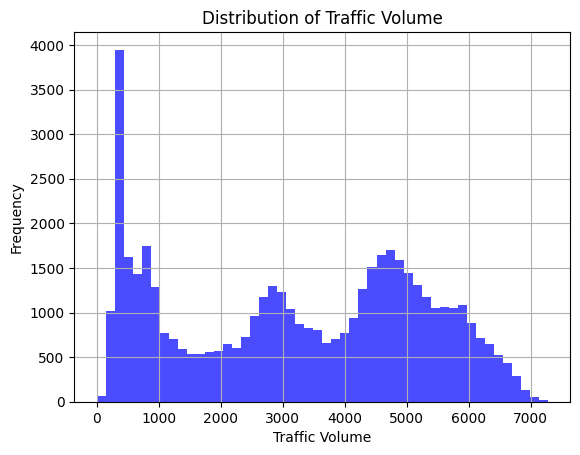

In [92]:
%matplotlib inline

# plot the traffic volume over time
df['traffic_volume'].hist(bins=50, alpha=0.7, color='blue')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Volume')
plt.show()

By observing the frequency histogram, it can be seen that traffic volumes around **500** are **the most frequent**, followed by traffic volumes around **4700** and **2800**.

Then let's dive into the column by finding the insight of its **statistics** knowledge.

In [93]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The statistics description shows the **mean** of traffic volume is around **3260**, and **75%** of the traffic volume is less than or equal to **4933**.

About **25%** of the time, there were **1,193** cars on the road - this is possibly because **the road is under construction or the time is late**. 

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: **comparing daytime data and nighttime data**.

We will start by dividing the dataset into two parts:
- **Daytime data**: hours from 7 a.m. to 7 p.m. (12 hours)
- **Nighttime data**: hours from 7 p.m. to 7 a.m. (12 hours)

### Traffic Volume: Day vs. Night

In [ ]:
# transform the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['daytime'] = df['hour'].apply(lambda x: 'Daytime' if 7 <= x <= 19 else 'Nighttime')

# split the dataset into daytime and nighttime
daytime_df = df[df['daytime'] == 'Daytime'].copy() # copy to avoid SettingWithCopyWarning
nighttime_df = df[df['daytime'] == 'Nighttime'].copy()

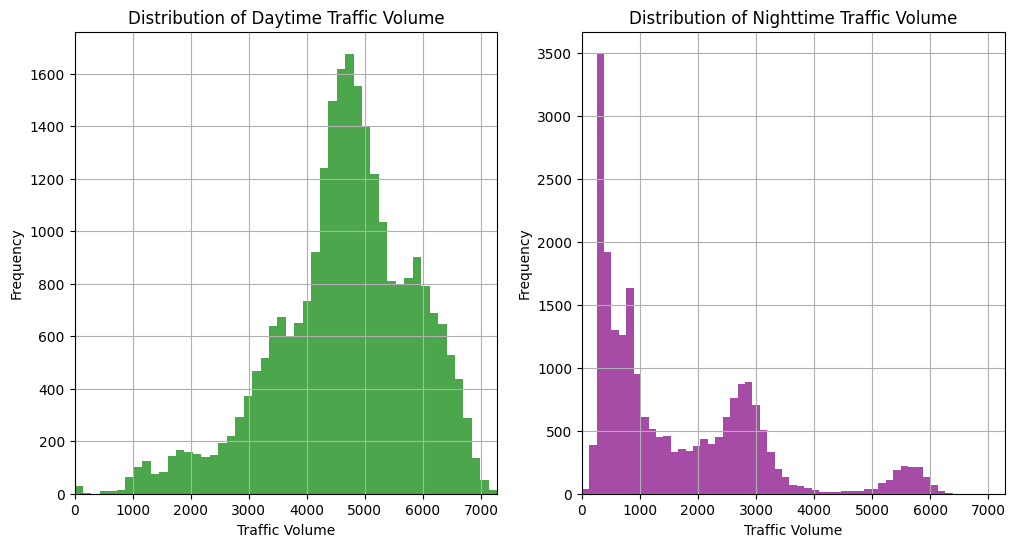

In [95]:
# set the same limits for both axes
min_val = df['traffic_volume'].min()
max_val = df['traffic_volume'].max()

# daytime traffic volume frequency distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
daytime_df['traffic_volume'].hist(bins=50, alpha=0.7, color='green')
plt.xlim(min_val, max_val)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daytime Traffic Volume')

# nighttime traffic volume frequency distribution
plt.subplot(1, 2, 2)
nighttime_df['traffic_volume'].hist(bins=50, alpha=0.7, color='purple')
plt.xlim(min_val, max_val)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Nighttime Traffic Volume')
plt.show()

The **daytime histogram** is **right-skewed** with most values on the higher end, and the **nighttime** hisgoram is a **multimodal distribution** with **three peaks**.

The daytime traffic volume histogram shows a strong peak around **4500** vehicles, indicating that high traffic is most common during the day, likely due to work and school commutes. In contrast, the nighttime histogram has its highest frequencies at much lower volumes, around **400**, with a smaller **secondary peak** near **2800**. This suggests that traffic is generally much lighter at night, with only occasional moderate increases, possibly due to late events or shift changes. **Overall, traffic volume is significantly higher and more concentrated during daytime hours compared to nighttime.**

Because traffic is light at night, there isn't a heavy traffic problem, **thus we shouldn't use the nighttime data**.

### Time Indicators
One of the possible indicators of heavy traffic is **time**. There might be more people on the road in **a certain month, on a certain day, or at a certain time of the day**. We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- **Month**
- **Day of the week**
- **Time of day**

In [ ]:
# calculate the average traffic volume by month for daytime traffic only
daytime_df['month'] = daytime_df['date_time'].dt.month
by_month = daytime_df.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

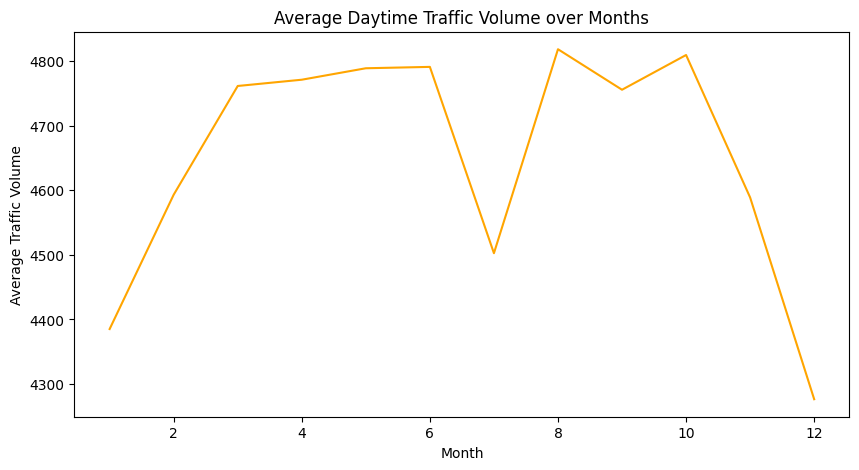

In [99]:
by_month['traffic_volume'].plot(kind='line', figsize=(10, 5), color='orange')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Daytime Traffic Volume over Months')
plt.show()


Several observations can be seen from the above line chart:

- Traffic volume generally **increases** from January and reaches a **high and steady level** from March to June.
- There is a noticeable **dip** in July, followed by a **sharp increase** in August.
- The **highest average** traffic volumes occur in August and October.
- Traffic volume **drops significantly** in November and reaches its **lowest point** in December.